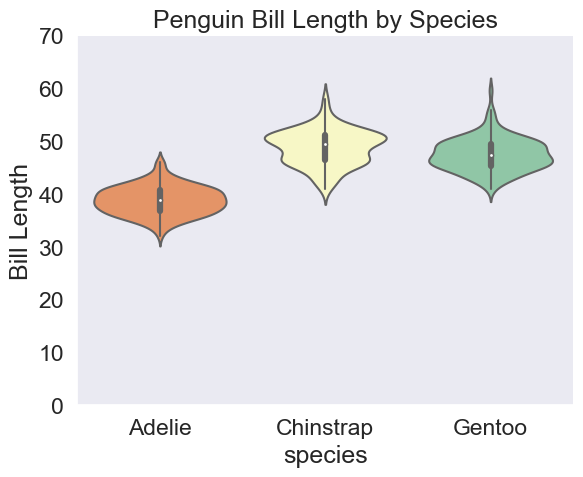

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("penguins")
sns.set_theme(style="white", font_scale = 1.5)

sns.violinplot(x=df["species"], y=df["bill_length_mm"], palette="Spectral").set(title='Penguin Bill Length by Species', ylabel='Bill Length', ylim=(0,70))
sns.despine(top=True, right=True)
plt.savefig('viz1.png')

In [24]:
test1 = 5
test2 = 0 

def always_false(num):
    return num < 0 and num > 0

assert not always_false(test1) 
assert not always_false(test2)

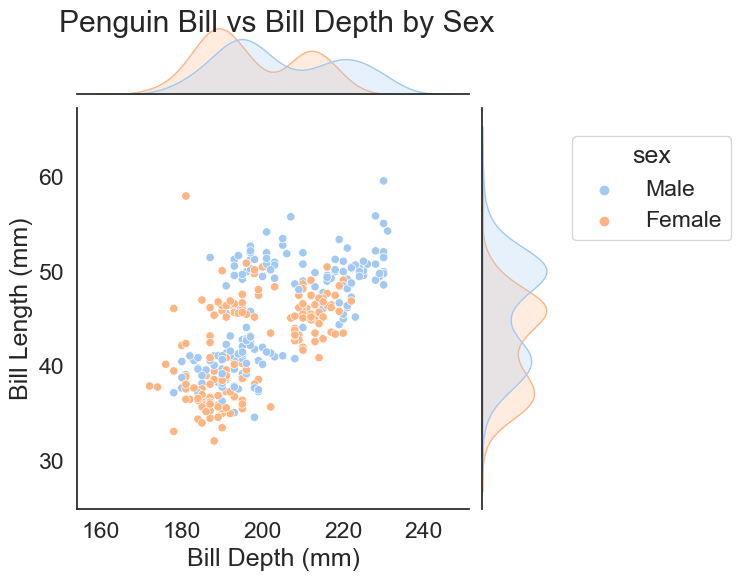

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("penguins")
sns.set_theme(style="white", font_scale = 1.5)

ax = sns.jointplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="sex", palette="pastel")
plt.suptitle("Penguin Bill vs Bill Depth by Sex");
plt.ylabel("Bill Length (mm)")
plt.xlabel("Bill Depth (mm)")
sns.move_legend(ax.ax_joint,"right",bbox_to_anchor=(1.7, 0.8))

#sns.violinplot(x=df["species"], y=df["bill_length_mm"], palette="Spectral").set(title='Penguin Bill Length by Species', ylabel='Bill Length', ylim=(0,70))

plt.savefig('viz2.png')